<a href="https://colab.research.google.com/github/humilitykind/Battery-Disassembly/blob/main/Pretraining_yolov5_screws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Feb 25 09:00:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install YOLOv5


In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 26.05 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.


In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.5.1+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=e6400c36-7bf9-b6b9-84da-c69fb173c747, L2_cache_size=4MB)


## Step 6: Download a Dataset

Run the code below to authenticate with Roboflow and download the dataset. Follow the link to generate an authentication token.

Alternatively, provide an API key like so: `rf = Roboflow(api_key=...)`

> 🟢 **Tip:** The examples below work even if you use our non-custom dataset. However, you won't be able to deploy the model to Roboflow. To do that, create a custom dataset as described above or fork (copy) one into your [workspace](https://app.roboflow.com/) from [Universe](https://universe.roboflow.com/).

In [ ]:
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
%cd /content/yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5cHbrjv7frxDORddGMi6")
project = rf.workspace("screw-detection-8opsd").project("screw-detection-cegy2-a0uff")
version = project.version(3)
dataset = version.download("yolov5")


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Screw-Detection-3 in yolov5pytorch:: 100%|██████████| 9716/9716 [00:01<00:00, 5164.20it/s]


In [ ]:
%cd /content/yolov5

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="5cHbrjv7frxDORddGMi6")
project = rf.workspace("screw-detection-8opsd").project("screw-detection-cegy2-a0uff")
version = project.version(2)
dataset = version.download("yolov5")


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Screw-Detection-2 in yolov5pytorch:: 100%|██████████| 964/964 [00:00<00:00, 8402.29it/s]


In [ ]:
%cd /content/yolov5
!pip install -q roboflow==1.1.48

import roboflow
roboflow.login()

# rf = roboflow.Roboflow()
# project = rf.workspace("model-examples").project("cash-counter-p08xm")
# dataset = project.version(3).download("yolov5")

rf = Roboflow(api_key="5cHbrjv7frxDORddGMi6")
project = rf.workspace("screw-detection-8opsd").project("screw-detection-cegy2-a0uff")
version = project.version(2)
dataset = version.download("yolov5")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


ValueError: Invalid API key. Please check your API key and try again.

# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **cache:** cache images for faster training

In [ ]:
dataset.location

'/content/datasets/Screw-Detection-3'

In [ ]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 25 \
  --data {dataset.location}/data.yaml \
  --weights yolov5m.pt \
  --name yolov5m_results  \
  --cache

Streaming output truncated to the last 5000 lines.
      16/24         7G    0.01975    0.02256   0.001509        168        640:  12% 32/278 [00:13<01:37,  2.52it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      16/24         7G    0.01987    0.02266   0.001491        120        640:  12% 33/278 [00:13<01:39,  2.46it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      16/24         7G    0.02021    0.02279   0.001477        166        640:  12% 34/278 [00:14<01:41,  2.40it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      16/24         7G    0.02009 

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

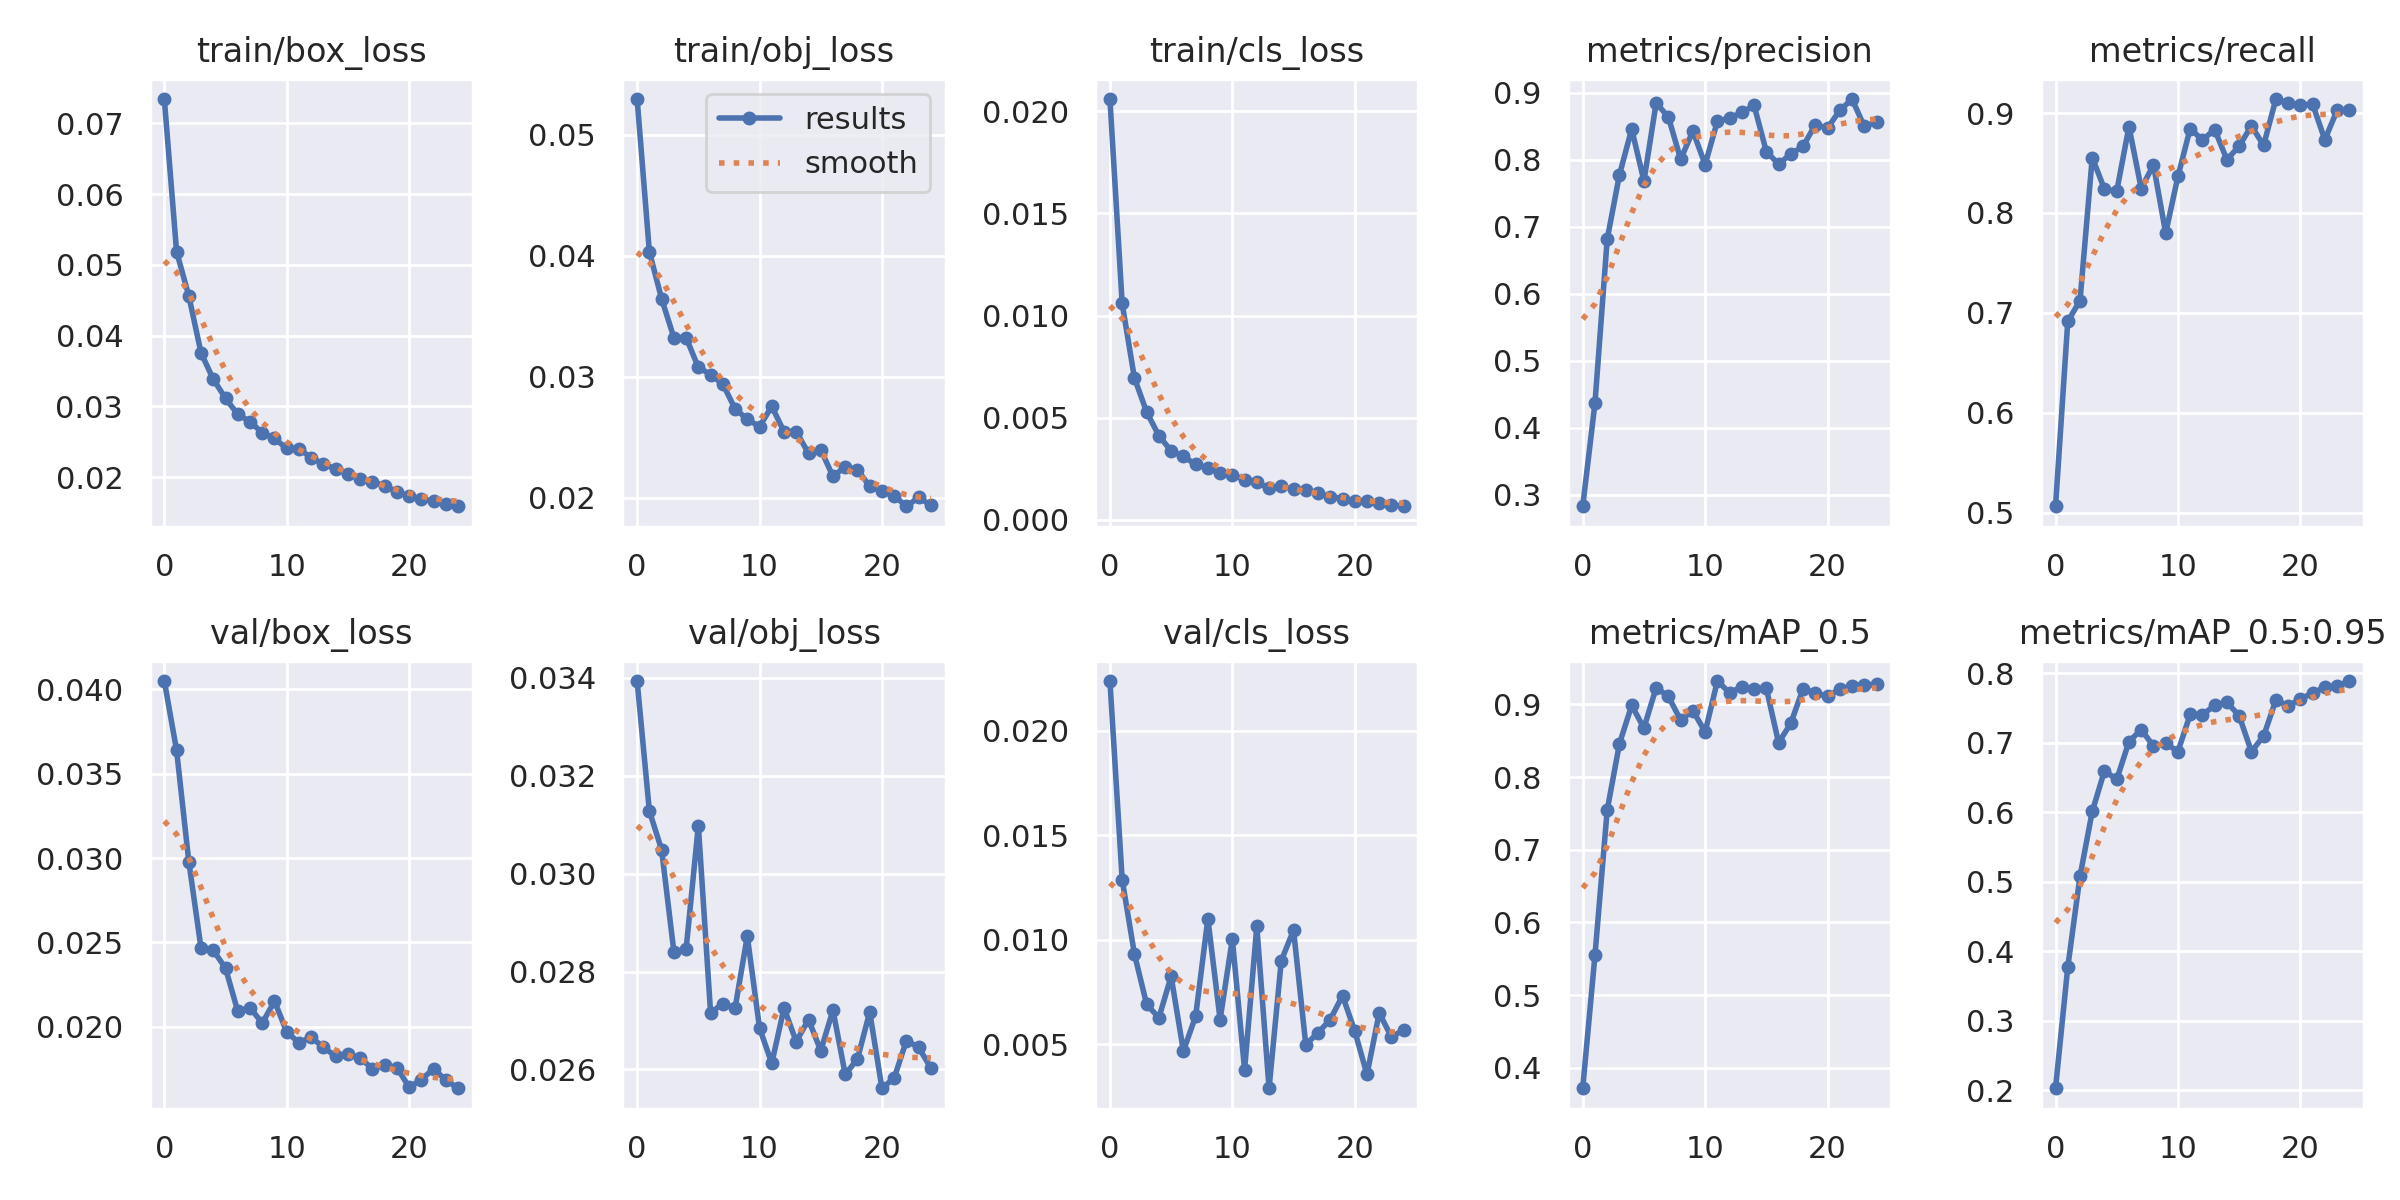

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5m_results2/results.png', width=1000)

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

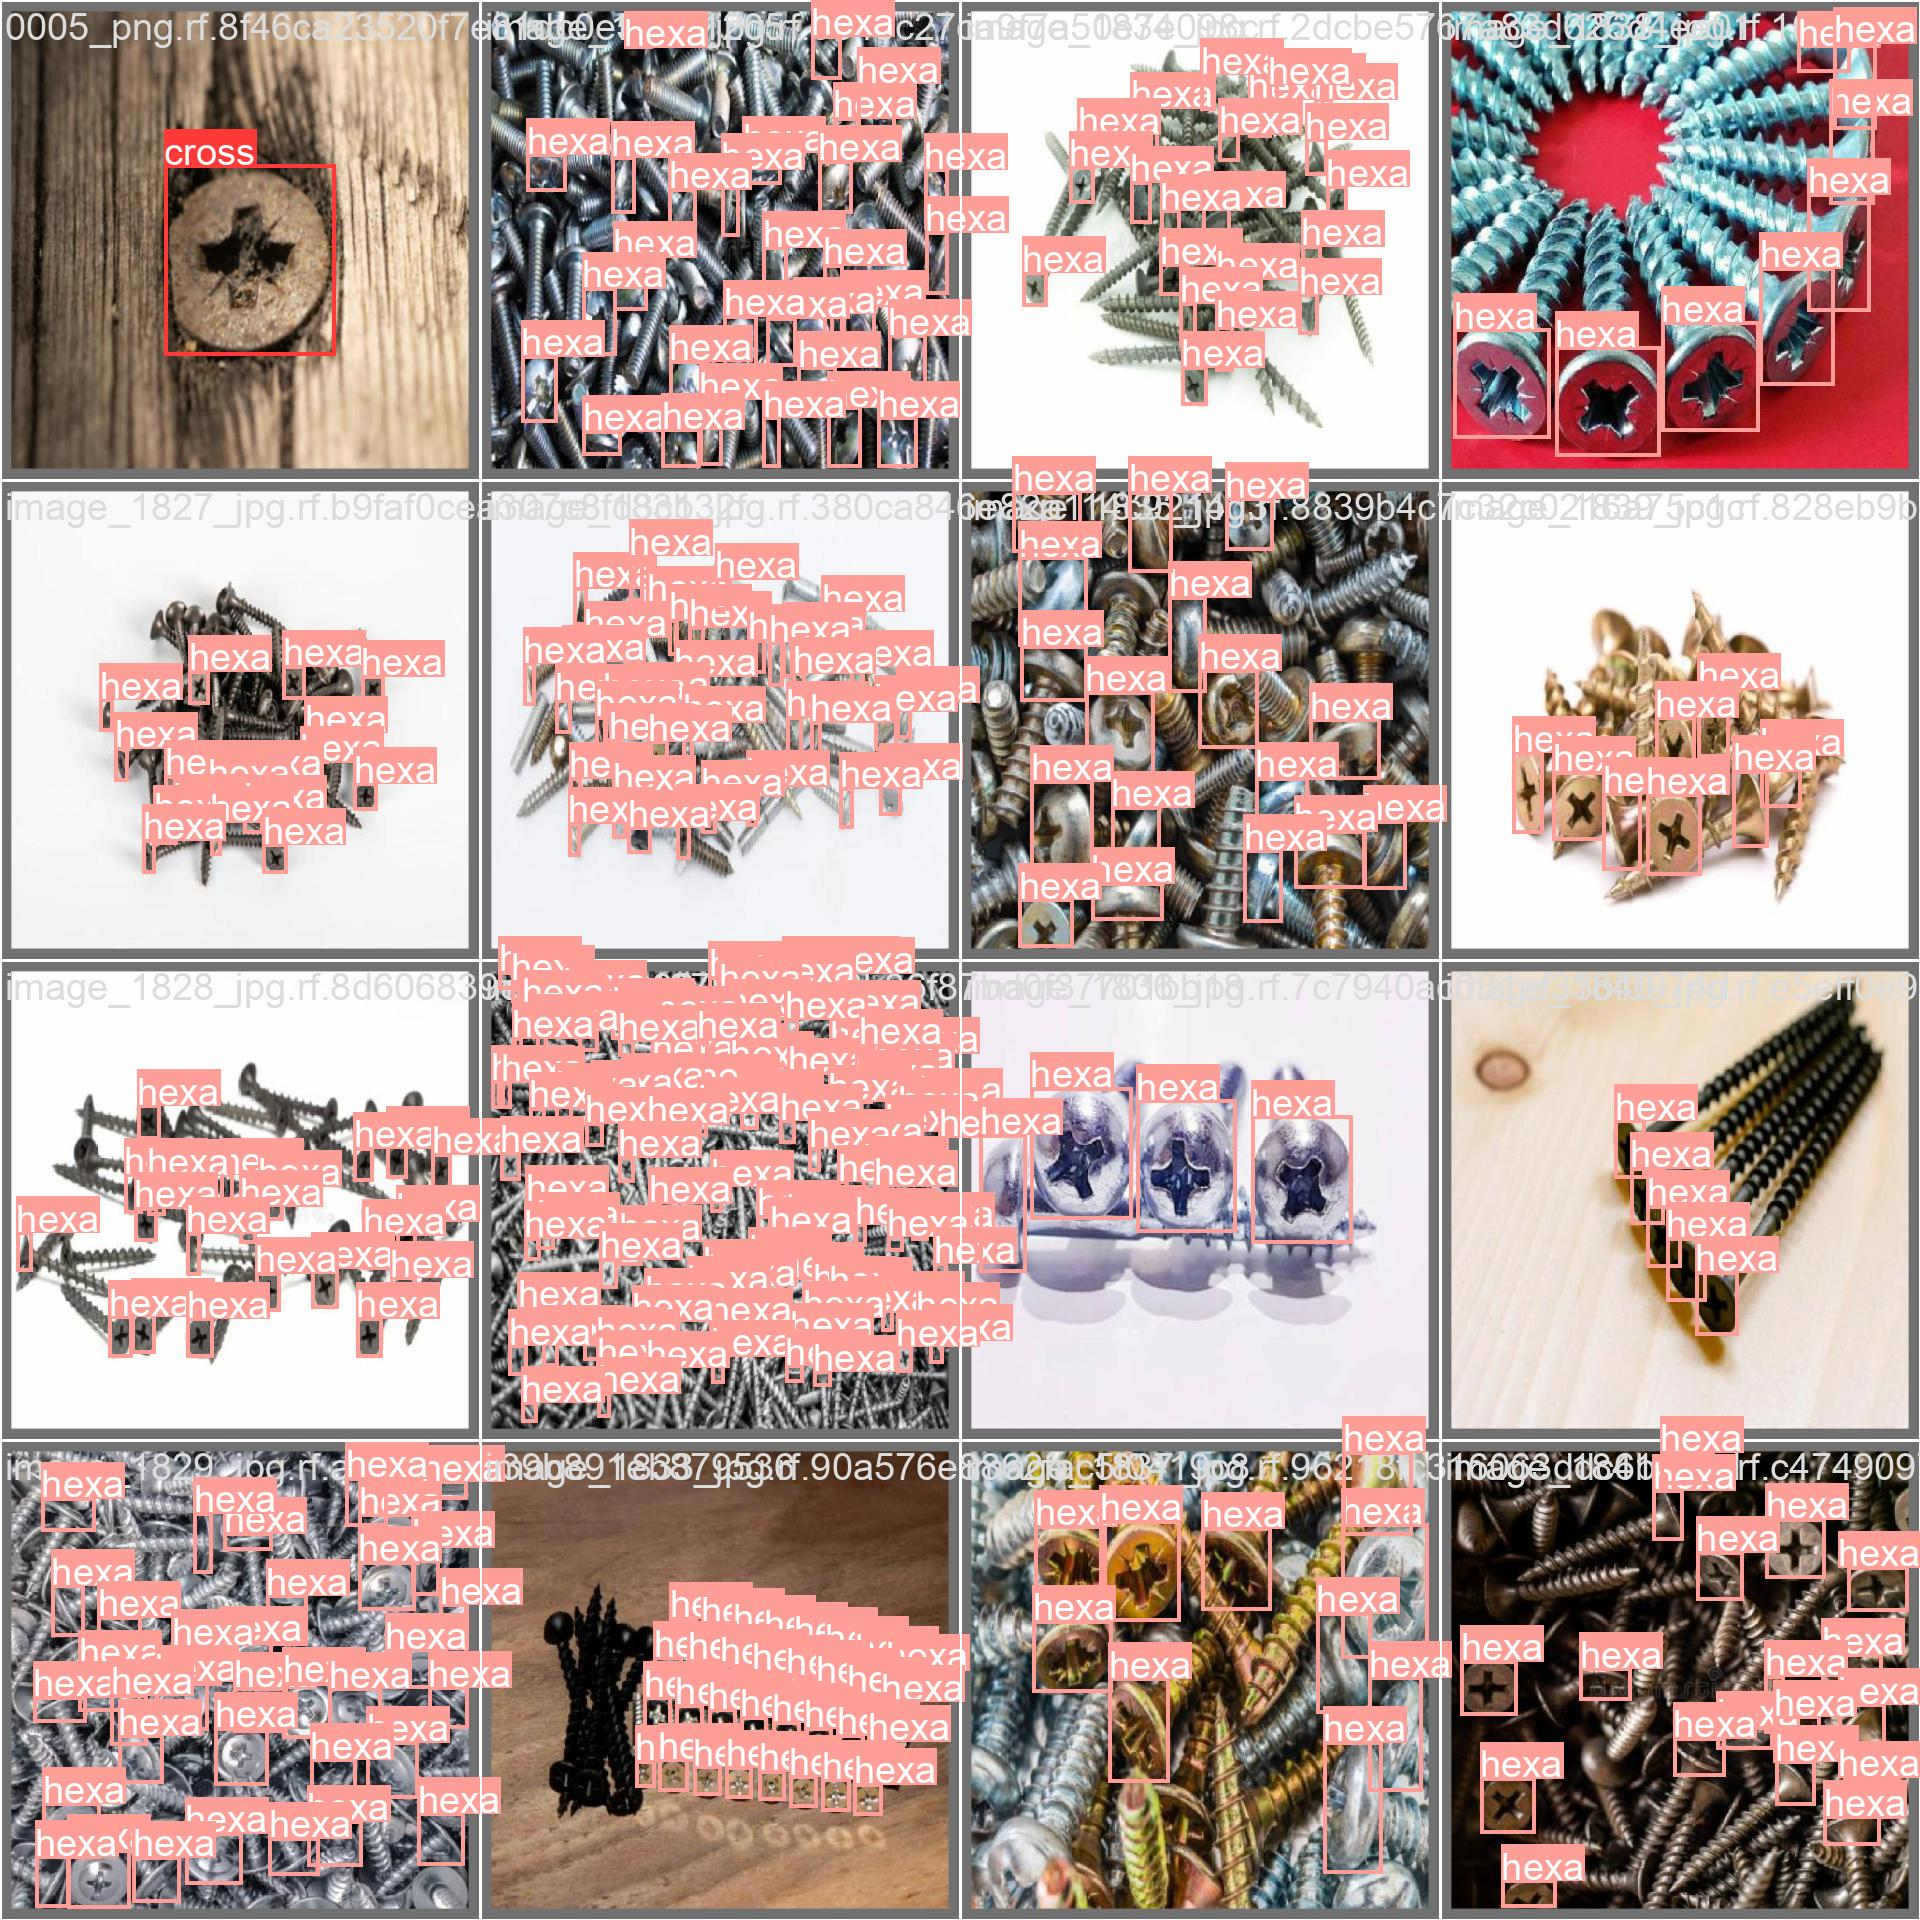

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5m_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


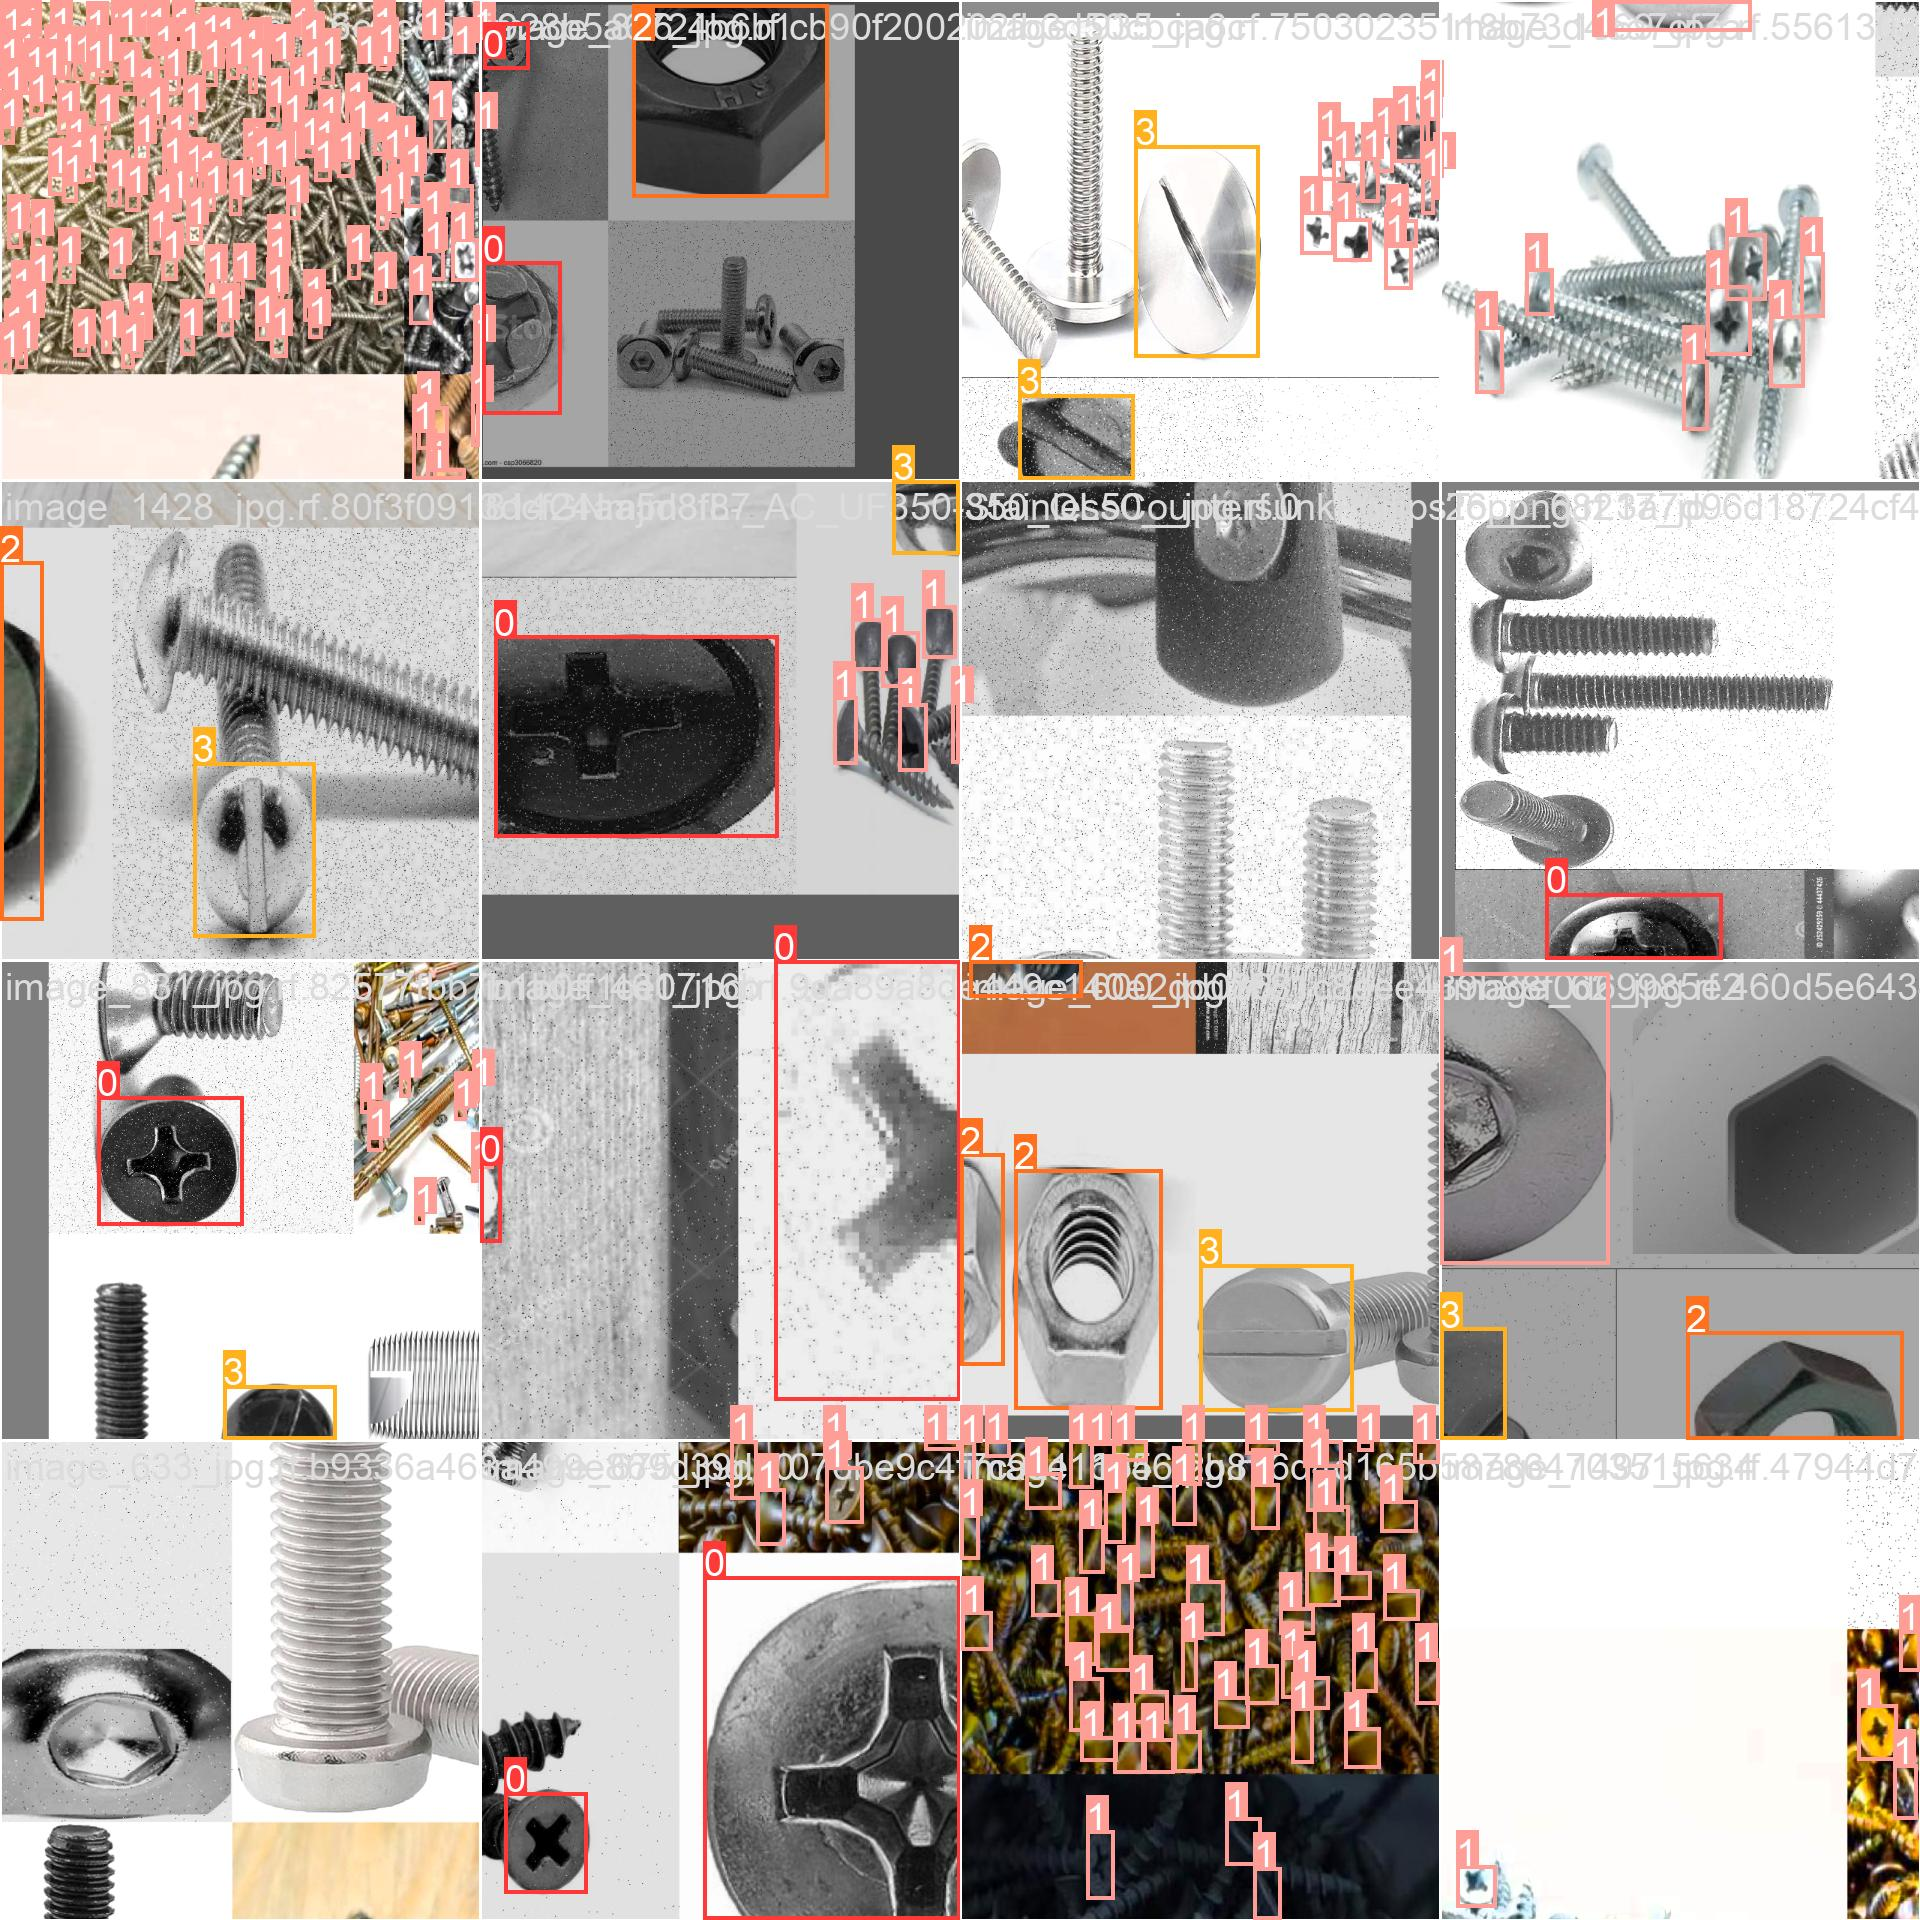

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg', width=900)

# Run Inference With Trained Weights

Next, we can run inference with a pretrained checkpoint on all images in the `test/images` folder to understand how our model performs on our test set.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5m_results2/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5m_results2/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5m_results2/weights/best.pt'], source=/content/datasets/Screw-Detection-3/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/147 /content/datasets/Screw-Detection-3/test/images/0100_png.rf.6e63ed8d461012d7ba13c84f61dbddd8.jpg: 416x416 1 cross, 15.7ms
image 2/147 /content/datasets/Screw-Detection-3/test/images/10-32-standard-truss-head-rack-screws-front_1_4_1_jpg.rf.748e

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select an image file


Saving pic-7.jpg to pic-7 (1).jpg


In [ ]:
!python detect.py --weights runs/train/yolov5m_results2/weights/best.pt --img 1280 --conf 0.25 --source pic-7.jpg



detect: weights=['runs/train/yolov5m_results2/weights/best.pt'], source=pic-7.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/yolov5/pic-7.jpg: 992x1280 2 crosss, 5 hexas, 67.1ms
Speed: 4.3ms pre-process, 67.1ms inference, 185.4ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp12


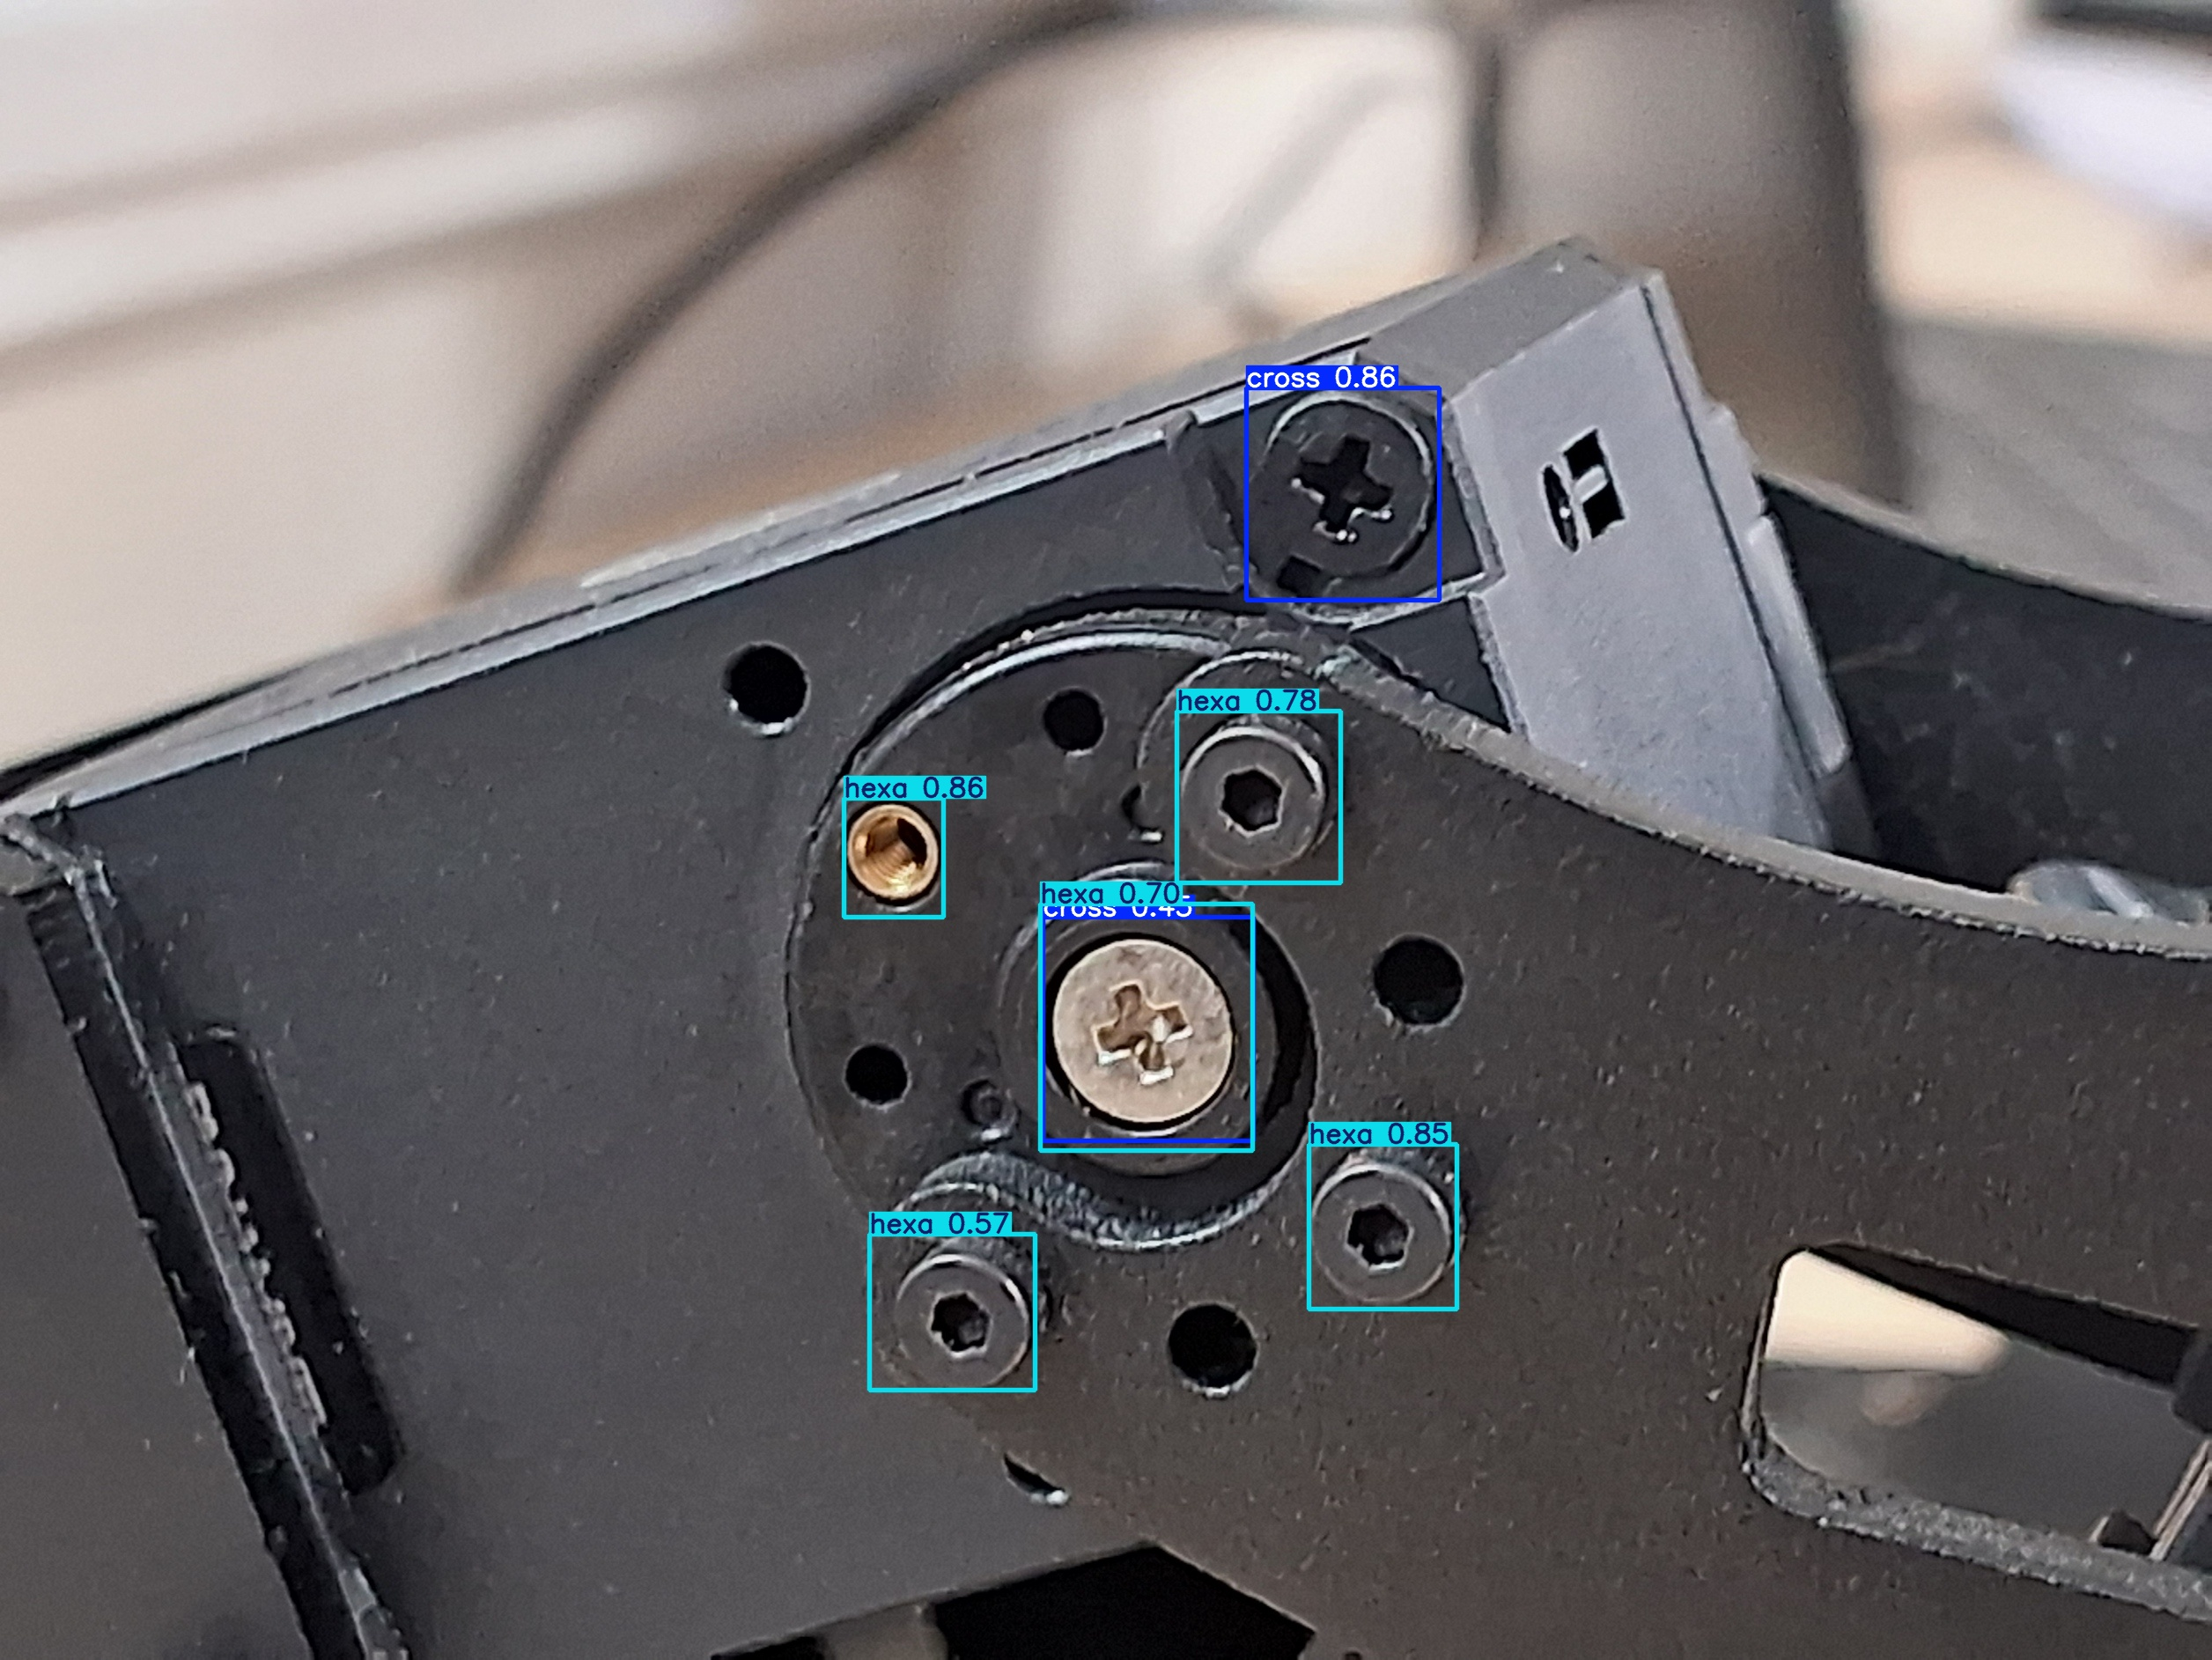

In [ ]:
import glob
from IPython.display import Image, display



for imageName in glob.glob('/content/yolov5/runs/detect/exp12/pic-7.jpg'): #assuming JPG
    display(Image(filename=imageName))

In [ ]:
!pip install torch torchvision torchaudio
!pip install ultralytics opencv-python pyrealsense2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import cv2
import pyrealsense2 as rs

# Load your trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-26 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
!realsense-viewer


/bin/bash: line 1: realsense-viewer: command not found


In [ ]:
!pip install jupyter_http_over_ws
!jupyter serverextension enable --py jupyter_http_over_ws


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.8 MB/s eta 0:00:00
Enabling: jupyter_http_over_ws
- Writing config: /root/.jupyter
    - Validating...
      jupyter_http_over_ws 0.0.7 OK


In [ ]:
pip install pyrealsense2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 45.8 MB/s eta 0:00:00


In [ ]:
import pyrealsense2 as rs
print("Intel RealSense SDK is installed successfully!")


Intel RealSense SDK is installed successfully!


In [ ]:
import pyrealsense2 as rs

context = rs.context()
devices = context.query_devices()

if len(devices) == 0:
    print("No Intel RealSense camera detected. Check connections.")
else:
    for device in devices:
        print(f"Connected to: {device.get_info(rs.camera_info.name)}")


No Intel RealSense camera detected. Check connections.


In [ ]:
!wmic path CIM_LogicalDevice where "Description like '%USB%'" get /value


/bin/bash: line 1: wmic: command not found


In [ ]:
!realsense-viewer


/bin/bash: line 1: realsense-viewer: command not found


In [ ]:
import pyrealsense2 as rs
import numpy as np
import cv2
import torch

# Check for connected RealSense devices
ctx = rs.context()
devices = ctx.query_devices()

if len(devices) == 0:
    print("No RealSense devices found!")
    exit()

# Print information about the connected device
for dev in devices:
    print(f"Found device: {dev.get_info(rs.camera_info.name)}")
    print(f"    Serial number: {dev.get_info(rs.camera_info.serial_number)}")
    print(f"    Firmware version: {dev.get_info(rs.camera_info.firmware_version)}")

# Initialize the Intel RealSense pipeline
pipeline = rs.pipeline()
config = rs.config()

try:
    # Enable the color stream (adjust resolution and frame rate as needed)
    config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

    # Start streaming
    pipeline.start(config)
    print("RealSense pipeline started successfully")

    # Capture a few frames to ensure the camera is working
    for i in range(5):
        frames = pipeline.wait_for_frames()
        color_frame = frames.get_color_frame()
        if color_frame:
            print(f"Received color frame {i+1}")
        else:
            print(f"Failed to receive color frame {i+1}")

    print("Camera check complete. Proceeding with main loop...")

    # Rest of your code here...
    # (YOLOv5 model loading and main detection loop)

except Exception as e:
    print(f"Error: {str(e)}")
finally:
    pipeline.stop()
    cv2.destroyAllWindows()


No RealSense devices found!
Error: No device connected


RuntimeError: stop() cannot be called before start()

In [ ]:

# Initialize the Intel RealSense pipeline
pipeline = rs.pipeline()
config = rs.config()

# Enable the color stream (adjust resolution and frame rate as needed)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

# Real-time detection loop
try:
    while True:
        # Wait for a frame from the RealSense camera
        frames = pipeline.wait_for_frames()
        color_frame = frames.get_color_frame()

        if not color_frame:
            continue

        # Convert the frame to a numpy array
        frame = np.asanyarray(color_frame.get_data())

        # Perform detection with YOLOv5
        results = model(frame)

        # Display results on the frame
        annotated_frame = results[0].plot()  # Annotate frame with detections

        # Display the output
        cv2.imshow('YOLOv5 RealSense Detection', annotated_frame)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    # Stop the camera and close OpenCV window
    pipeline.stop()
    cv2.destroyAllWindows()


RuntimeError: No device connected

## Deploy Model on Roboflow

Once you have finished training your YOLOv5 model, you’ll have a set of trained weights ready for use. These weights will be in the `/content/yolov5/runs/train/yolov5s_results/` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv5 weights.

**Before you run this code, make sure you create a new Version in the Roboflow dashboard following the instructions we covered earlier. Fill in your project name, workspace, and version number below.**

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov5", model_path=f"/content/yolov5/runs/train/yolov5s_results/")

View the status of your deployment at: https://app.roboflow.com/model-examples/cash-counter-p08xm/3
Share your model with the world at: https://universe.roboflow.com/model-examples/cash-counter-p08xm/model/3


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on IMG_2228_jpeg_jpg.rf.5eca43a432fa01e6214b8a48b13f1823.jpg


{'predictions': [{'x': 187.0,
   'y': 366.5,
   'width': 336.0,
   'height': 275.0,
   'confidence': 0.9629614949226379,
   'class': 'ten',
   'class_id': 8,
   'detection_id': 'adcdcc63-a0cf-4006-8f51-6c2c78eb5bce',
   'image_path': '/content/yolov5/cash-counter-3/test/images/IMG_2228_jpeg_jpg.rf.5eca43a432fa01e6214b8a48b13f1823.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""
iou_threshold = 0.5

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_threshold,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [ ]:
!pip install inference-cli && inference server start


Error connecting to Docker daemon. Is docker installed and running? See https://www.docker.com/get-started/ for installation instructions.


In [ ]:
from inference_sdk import InferenceHTTPClient

client = InferenceHTTPClient(
    api_url="http://localhost:5001", # use local inference server
    api_key="5cHbrjv7frxDORddGMi6"
)

result = client.run_workflow(
    workspace_name="screw-detection-8opsd",
    workflow_id="detect-count-and-visualize",
    images={
        "image": "pic-7.jpg"
    }
)


ConnectionError: HTTPConnectionPool(host='localhost', port=5001): Max retries exceeded with url: /screw-detection-8opsd/workflows/detect-count-and-visualize (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x79d24cbe9410>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="5cHbrjv7frxDORddGMi6"
)

result = client.run_workflow(
    workspace_name="screw-detection-8opsd",
    workflow_id="detect-count-and-visualize-2",
    images={
        "image": "pic-7.png"
    },
    use_cache=True # cache workflow definition for 15 minutes
)


In [ ]:
result

[{'count_objects': 3,
  'output_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAddCdADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9dywYbpO46Zxmkz8n2gjOM8b+2P8AP41DGJp4mkZgPQ9zxSrKwjEe0YA5J/8A11pvq9wHqFcKVPHJJFLDtikyrD2prF1wUdTkZIyOPqKpm4YzkA/eHXGAPxou9tilqrG

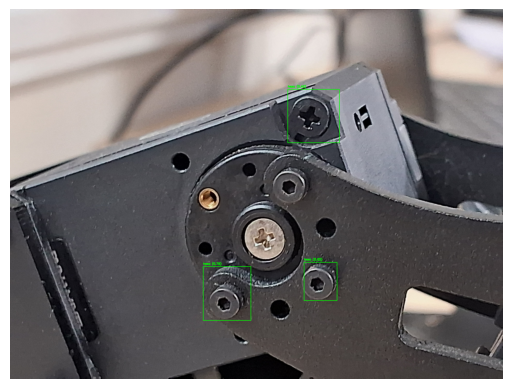

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Path to your local image
image_path = "pic-7.png"

# Example result from API


# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Extract predictions
predictions = result[0]['predictions']['predictions']

# Draw bounding boxes
for pred in predictions:
    x, y, w, h = pred["x"], pred["y"], pred["width"], pred["height"]
    class_name = pred["class"]

    # Convert center (x, y) to top-left (x1, y1)
    x1, y1 = int(x - w / 2), int(y - h / 2)
    x2, y2 = int(x + w / 2), int(y + h / 2)

    # Define box color and thickness
    color = (0, 255, 0)  # Green
    thickness = 2

    # Draw the rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Add label text
    label = f"{class_name} ({pred['confidence']:.2f})"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axis
plt.show()
